# Imports

In [524]:
import pandas as pd
import matplotlib.pyplot as plt

In [525]:
coal = pd.read_csv('outputs/coal.csv')

In [526]:
gas = pd.read_csv('outputs/gas.csv')

In [527]:
oil = pd.read_csv('outputs/oil.csv')

# Gas

## Evolution of the production

### Production every 10 years

In [608]:
# Sum up the gas production year by year
yearly_production_gas = gas.groupby('year')['gas_production'].sum()

In [609]:
# Create a list containing all the years between 1930 and 2020, every 10 years
years = list(range(1900, 2020, 10))

In [610]:
# Keep only the years included in the years list
yearly_production_evolution_gas = yearly_production_gas[yearly_production_gas.index.isin(years)]

In [611]:
# Convert to Dataframe
yearly_production_evolution_gas = pd.DataFrame(yearly_production_evolution_gas).reset_index()

In [612]:
# Calculate the growth rate for the production of gas
yearly_production_evolution_gas['Value-Before'] = yearly_production_evolution_gas['gas_production'].shift(1)

yearly_production_evolution_gas['Growth_Rate'] = (yearly_production_evolution_gas['gas_production'] - 
                                               yearly_production_evolution_gas['Value-Before'])/yearly_production_evolution_gas['Value-Before']

In [613]:
yearly_production_evolution_gas.head()

,year,gas_production,Value-Before,Growth_Rate
0,1900,73.840,NaN,NaN
1,1910,157.589,73.840,1.134196
2,1920,241.353,157.589,0.531535
3,1930,594.971,241.353,1.465149
4,1940,971.749,594.971,0.633271


It seems the production increase slows down during periods of wars.

Let's check details year by year to see if it's real.

### Production between 1940 and 1960

In [534]:
yearly_production_1900_1960 = yearly_production_gas[(yearly_production_gas.index>=1900) & (yearly_production_gas.index<1961)]

In [535]:
# Convert to Dataframe
yearly_production_1900_1960 = pd.DataFrame(yearly_production_1900_1960).reset_index()

In [536]:
# Calculate the growth rate for the production of gas
yearly_production_1900_1960['Value-Before'] = yearly_production_1900_1960['gas_production'].shift(1)

yearly_production_1900_1960['Growth_Rate'] = (yearly_production_1900_1960['gas_production'] - 
                                               yearly_production_1900_1960['Value-Before'])/yearly_production_1900_1960['Value-Before']

In [537]:
top_10_growth_rate = yearly_production_1900_1960['Growth_Rate'].nlargest(10)

top_10_years = yearly_production_1900_1960.loc[top_10_growth_rate.index, ['year', 'Growth_Rate']]

top_10_years

,year,Growth_Rate
51,1951,0.188199
23,1923,0.169915
50,1950,0.147062
24,1924,0.145243
48,1948,0.132241
25,1925,0.126817
26,1926,0.112545
1,1901,0.108180
59,1959,0.105426
27,1927,0.101164


In [538]:
worst_10_growth_rate = yearly_production_1900_1960['Growth_Rate'].nsmallest(10)

worst_10_years = yearly_production_1900_1960.loc[worst_10_growth_rate.index, ['year', 'Growth_Rate']]

worst_10_years

,year,Growth_Rate
21,1921,0.034704
20,1920,0.035956
36,1936,0.036448
19,1919,0.037293
35,1935,0.037826
18,1918,0.038742
34,1934,0.039315
17,1917,0.040299
33,1933,0.040925
16,1916,0.041991


The end of the World War II seemed to have boosted the production of gas.

## Production Increase

In [539]:
# Increase of production between 1950 and 1900
yearly_production_gas[1950]/yearly_production_gas[1900]

27.934656013001085

## Production Peak

In [614]:
yearly_production_gas.head()

year
1900     73.840
1901     81.828
1902     89.816
1903     97.803
1904    105.791
Name: gas_production, dtype: float64

In [541]:
yearly_production_gas.idxmax()

2022

## Top 10 Producers year by year

In [542]:
# Sort the dataframe by year (oldest to most recent) and gas production
gas_sorted = gas.sort_values(['year', 'gas_production'], ascending=[True, False])

In [543]:
# Get the 10 countries producing the most year by year
top_10_gas = gas_sorted.groupby('year').head(10)

In [544]:
# Remove the values equal to 0
top_10_gas = top_10_gas.query("gas_production!=0")

In [545]:
# Get the country producing the most year by year
top_1_gas = gas_sorted.groupby('year').head(1)

In [546]:
# Top 1 country
top_1_gas['country'].unique()

array(['United States'], dtype=object)

### Focus on the United States

In [547]:
# Create a dataframe dedicated to the United States
usa_gas = gas.query("country=='United States'")

In [548]:
# Merge the US dataframe with the overall yearly production dataframe to estimate the percentage of production made by the US
us_percentage = pd.merge(usa_gas[['year','gas_production']],pd.DataFrame(yearly_production_gas).reset_index(),on='year',how='inner')

In [549]:
# Rename the columns to be clear
us_percentage = us_percentage.rename(columns={'gas_production_x' : 'us_production', 'gas_production_y' : 'world_production'})

In [550]:
us_percentage['US_Percentage'] = us_percentage['us_production']/us_percentage['world_production']*100

In [605]:
us_percentage.head()

,year,us_production,world_production,US_Percentage
0,1900,73.840,73.840,100.0
1,1901,81.828,81.828,100.0
2,1902,89.816,89.816,100.0
3,1903,97.803,97.803,100.0
4,1904,105.791,105.791,100.0


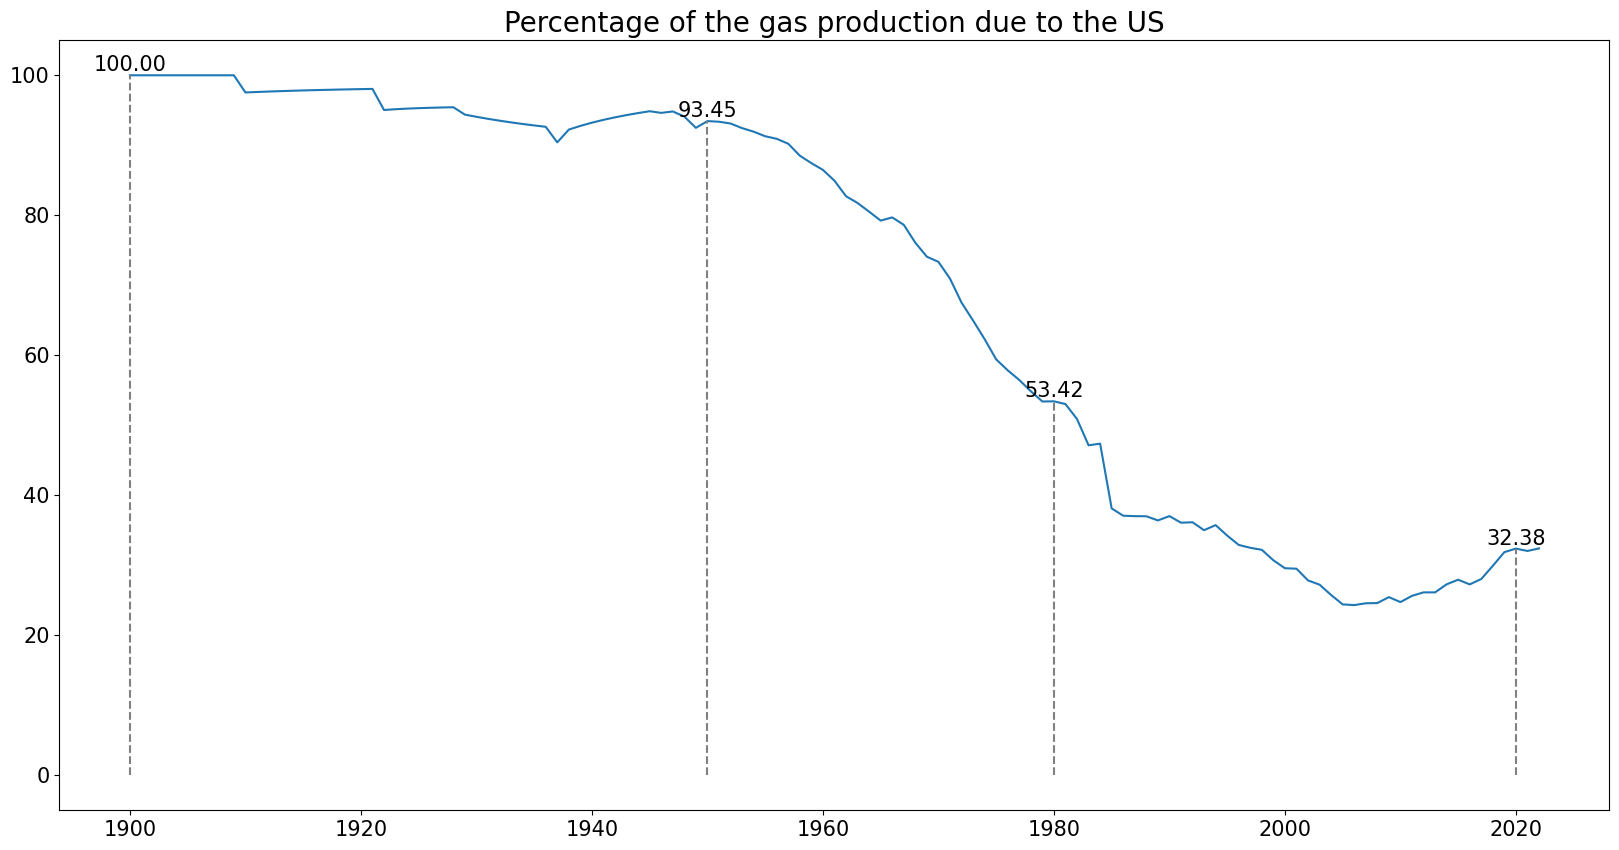

In [552]:
# Plot
plt.figure(figsize=(20,10))

plt.plot(us_percentage['year'], us_percentage['US_Percentage'])

# Print the values for some years
years_to_label = [1900, 1950, 1980, 2020]

for year in years_to_label:
    value = us_percentage.loc[us_percentage['year'] == year, 'US_Percentage'].values[0]

    plt.vlines(x=year, ymin=0, ymax=value, colors='gray', linestyles='dashed')
    
    plt.text(year, value, f'{value:.2f}', ha='center', va='bottom', fontsize=15)

# Font sizes
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Title
plt.title("Percentage of the gas production due to the US", fontsize = 20)

plt.show()

### Which countries also produce a lot of gas ?

In [553]:
# Producers in 1900
gas_1900 = gas.query("year==1900")

# Producers in 1950
gas_1950 = gas.query("year==1950")

# Producers in 1980
gas_1980 = gas.query("year==1980")

# Producers in 2020
gas_2020 = gas.query("year==2020")

In [554]:
# Production Percentages in 1950
gas_1950["Percentage"] = gas_1950["gas_production"]/gas_1950["gas_production"].sum()

# Production Percentages in 1980
gas_1980["Percentage"] = gas_1980["gas_production"]/gas_1980["gas_production"].sum()

# Production Percentages in 2020
gas_2020["Percentage"] = gas_2020["gas_production"]/gas_2020["gas_production"].sum()

/var/folders/5q/f280wjd15s56_y9s5ntbx3rw0000gn/T/ipykernel_8751/184146637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gas_1950["Percentage"] = gas_1950["gas_production"]/gas_1950["gas_production"].sum()
/var/folders/5q/f280wjd15s56_y9s5ntbx3rw0000gn/T/ipykernel_8751/184146637.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gas_1980["Percentage"] = gas_1980["gas_production"]/gas_1980["gas_production"].sum()
/var/folders/5q/f280wjd15s56_y9s5ntbx3rw0000gn/T/ipykernel_8751/184146637.py:8: SettingWit

In [555]:
# Top 3 in 1950
gas_1950.sort_values(by="gas_production",ascending=False).head(3)

,Unnamed: 0,country,year,gas_production,gas_prod_per_capita,gas_prod_change_twh,Percentage
11245,20638,United States,1950,1927.675,13000.101,264.510,0.934542
9082,16835,Romania,1950,36.299,2214.290,-16.532,0.017598
2195,3701,Canada,1950,22.541,1640.159,2.452,0.010928


In [556]:
# Top 3 in 1980
gas_1980.sort_values(by="gas_production",ascending=False).head(3)

,Unnamed: 0,country,year,gas_production,gas_prod_per_capita,gas_prod_change_twh,Percentage
11275,20668,United States,1980,5250.907,23531.895,-44.510,0.534208
7579,13171,Netherlands,1980,799.444,56576.277,-27.222,0.081332
2225,3731,Canada,1980,712.279,29058.979,-58.293,0.072465


In [557]:
# Top 3 in 2020
gas_2020.sort_values(by="gas_production",ascending=False).head(3)

,Unnamed: 0,country,year,gas_production,gas_prod_per_capita,gas_prod_change_twh,Percentage
11315,20708,United States,2020,9161.045,27269.721,-120.065,0.323838
2616,4403,China,2020,1940.092,1361.535,172.678,0.068581
9029,16740,Qatar,2020,1749.348,633732.312,-22.176,0.061839


# Coal

## Evolution of the production

### Production every 10 years

In [558]:
# Sum up the coal production year by year
yearly_production_coal = coal.groupby('year')['coal_production'].sum()

In [559]:
# Create a list containing all the years between 1930 and 2020, every 10 years
years = list(range(1900, 2020, 10))

In [560]:
# Keep only the years included in the years list
yearly_production_evolution_coal = yearly_production_coal[yearly_production_coal.index.isin(years)]

In [561]:
# Convert to Dataframe
yearly_production_evolution_coal = pd.DataFrame(yearly_production_evolution_coal).reset_index()

In [562]:
# Calculate the growth rate for the production of coal
yearly_production_evolution_coal['Value-Before'] = yearly_production_evolution_coal['coal_production'].shift(1)

yearly_production_evolution_coal['Growth_Rate'] = (yearly_production_evolution_coal['coal_production'] - 
                                               yearly_production_evolution_coal['Value-Before'])/yearly_production_evolution_coal['Value-Before']

In [563]:
yearly_production_evolution_coal

,year,coal_production,Value-Before,Growth_Rate
0,1900,5103.599,NaN,NaN
1,1910,7715.660,5103.599,0.511808
2,1920,8458.241,7715.660,0.096243
3,1930,8379.156,8458.241,-0.009350
4,1940,9073.718,8379.156,0.082892
5,1950,9515.708,9073.718,0.048711
6,1960,11848.766,9515.708,0.245180
7,1970,12793.247,11848.766,0.079711
8,1980,16334.000,12793.247,0.276767
9,1990,23223.028,16334.000,0.421760


The production of coal seems to change a lot over the different years.

It increased a lot between 1900 and 1910, 1980 and 1990, and 2000 and 2010.

2 causes could arise: major inventions needing coal to work, or new countries discovering coals mines.

In [606]:
coal.head()

,country,year,coal_production,coal_prod_per_capita,coal_prod_change_twh
0,Afghanistan,1900,0.0,0.0,NaN
1,Afghanistan,1901,0.0,0.0,0.0
2,Afghanistan,1902,0.0,0.0,0.0
3,Afghanistan,1903,0.0,0.0,0.0
4,Afghanistan,1904,0.0,0.0,0.0


### Focus on 3 periods: 1900-1910, 1980-1990 and 2000-2010

#### 1900-1910

In [565]:
# Create a new dataframe containing values between 1900 and 1910
coal_1900_1910 = coal.query("year >= 1900 and year <= 1910")

In [566]:
# Countries having the highest change in coal production between 1900 and 1910
coal_1900_1910.groupby('country')['coal_prod_change_twh'].sum().nlargest(10)

country
United States     1573.172
Germany            276.170
United Kingdom     273.054
Poland              82.497
Japan               63.125
China               57.532
Canada              52.673
South Africa        42.028
France              40.153
India               38.325
Name: coal_prod_change_twh, dtype: float64

The end of the World War II seemed to have boosted the production of gas.

#### 1980-1990

In [567]:
# Create a new dataframe containing values between 1980 and 1990
coal_1980_1990 = coal.query("year >= 1980 and year <= 1990")

In [568]:
# Countries having the highest change in coal production between 1980 and 1990
coal_1980_1990.groupby('country')['coal_prod_change_twh'].sum().nlargest(10)

country
China            2733.788
United States     925.204
Australia         760.225
India             577.972
South Africa      462.373
Canada            169.907
Colombia          124.482
Indonesia          71.263
Greece             45.098
Thailand           37.963
Name: coal_prod_change_twh, dtype: float64

China accounted for the vast majority of the growth between 1980 and 1990.
    
To drag its quick development, the Asian country had to boost its production of coal.

#### 2000-2010

In [569]:
# Create a new dataframe containing values between 2000 and 2010
coal_2000_2010 = coal.query("year >= 2000 and year <= 2010")

In [570]:
# Countries having the highest change in coal production between 2000 and 2010
coal_2000_2010.groupby('country')['coal_prod_change_twh'].sum().nlargest(10)

country
China           11435.605
India            1270.904
Indonesia        1254.752
Australia         982.871
Colombia          331.138
Kazakhstan        258.014
South Africa      207.403
Mongolia          106.880
Philippines        39.837
Mexico             28.512
Name: coal_prod_change_twh, dtype: float64

The growth in coal production is huge between 2000 and 2010, a period of economic growth in the country.

### Which countries also produce a lot of coal ?

In [571]:
# Producers in 1900
coal_1900 = coal.query("year==1900")

# Producers in 1950
coal_1950 = coal.query("year==1950")

# Producers in 1980
coal_1980 = coal.query("year==1980")

# Producers in 2020
coal_2020 = coal.query("year==2020")


In [572]:
# Production Percentages in 1950
coal_1950["Percentage"] = coal_1950["coal_production"]/coal_1950["coal_production"].sum()

# Production Percentages in 1980
coal_1980["Percentage"] = coal_1980["coal_production"]/coal_1980["coal_production"].sum()

# Production Percentages in 2020
coal_2020["Percentage"] = coal_2020["coal_production"]/coal_2020["coal_production"].sum()

/var/folders/5q/f280wjd15s56_y9s5ntbx3rw0000gn/T/ipykernel_8751/1093235693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coal_1950["Percentage"] = coal_1950["coal_production"]/coal_1950["coal_production"].sum()
/var/folders/5q/f280wjd15s56_y9s5ntbx3rw0000gn/T/ipykernel_8751/1093235693.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coal_1980["Percentage"] = coal_1980["coal_production"]/coal_1980["coal_production"].sum()
/var/folders/5q/f280wjd15s56_y9s5ntbx3rw0000gn/T/ipykernel_8751/1093235693.py:

In [573]:
# Top 3 in 1950
coal_1950.sort_values(by="coal_production",ascending=False).head(3)

,country,year,coal_production,coal_prod_per_capita,coal_prod_change_twh,Percentage
10845,United States,1950,3827.293,25810.986,543.582,0.402208
10722,United Kingdom,1950,1504.714,30061.176,7.990,0.158129
3869,Germany,1950,1389.455,19579.684,88.339,0.146017


In [574]:
# Top 3 in 1980
coal_1980.sort_values(by="coal_production",ascending=False).head(3)

,country,year,coal_production,coal_prod_per_capita,coal_prod_change_twh,Percentage
10875,United States,1980,5455.289,24447.830,119.569,0.333984
2385,China,1980,4051.284,4123.979,505.552,0.248028
3899,Germany,1980,1604.107,20621.873,-59.378,0.098207


In [575]:
# Top 3 in 2020
coal_2020.sort_values(by="coal_production",ascending=False).head(3)

,country,year,coal_production,coal_prod_per_capita,coal_prod_change_twh,Percentage
2425,China,2020,22364.936,15695.465,210.496,0.559096
4906,India,2020,3497.081,2504.378,-1.797,0.087423
755,Australia,2020,3372.486,131378.250,-289.615,0.084308


### When do the USA stopped to be one of the most important producers?

In [576]:
# Create a dataframe dedicated to the United States
usa = coal.query("country=='United States'")

In [577]:
# Add the yearly production information
usa = pd.merge(usa, yearly_production_coal, on='year', how='inner')

In [578]:
# Rename columns
usa = usa.rename(columns={'coal_production_x' : 'coal_production', 'coal_production_y' : 'yearly_production'})

In [579]:
# Add the information of percentage of production
usa['Proportion_of_Production'] = usa['coal_production'] / usa['yearly_production']

In [580]:
usa.query("year>=1990")

,country,year,coal_production,coal_prod_per_capita,coal_prod_change_twh,yearly_production,Proportion_of_Production
90,United States,1990,6260.927,25237.154,313.879,23223.028,0.269600
91,United States,1991,6023.959,23946.395,-236.968,22747.660,0.264817
92,United States,1992,6040.026,23670.104,16.067,22992.156,0.262699
93,United States,1993,5661.802,21878.846,-378.224,22466.656,0.252009
94,United States,1994,6181.449,23568.705,519.646,23252.039,0.265845
95,United States,1995,6161.256,23192.211,-20.193,24088.892,0.255772
96,United States,1996,6345.179,23589.398,183.923,24553.223,0.258426
97,United States,1997,6489.806,23824.945,144.627,24971.065,0.259893
98,United States,1998,6694.604,24270.318,204.797,24608.489,0.272044
99,United States,1999,6485.757,23231.322,-208.847,24484.022,0.264898


Looks like the drop started at the beginning of the year 2000.

# Oil

## Evolution of the production

### Production every 10 years

In [581]:
# Sum up the oil production year by year
yearly_production_oil = oil.groupby('year')['oil_production'].sum()

In [582]:
# Create a list containing all the years between 1930 and 2020, every 10 years
years = list(range(1900, 2020, 10))

In [583]:
# Keep only the years included in the years list
yearly_production_evolution_oil = yearly_production_oil[yearly_production_oil.index.isin(years)]

In [584]:
# Convert to Dataframe
yearly_production_evolution_oil = pd.DataFrame(yearly_production_evolution_oil).reset_index()

In [585]:
# Calculate the growth rate for the production of oil
yearly_production_evolution_oil['Value-Before'] = yearly_production_evolution_oil['oil_production'].shift(1)

yearly_production_evolution_oil['Growth_Rate'] = (yearly_production_evolution_oil['oil_production'] - 
                                               yearly_production_evolution_oil['Value-Before'])/yearly_production_evolution_oil['Value-Before']

In [586]:
yearly_production_evolution_oil

,year,oil_production,Value-Before,Growth_Rate
0,1900,114.672,NaN,NaN
1,1910,401.676,114.672,2.502825
2,1920,1088.499,401.676,1.709893
3,1930,1752.164,1088.499,0.609707
4,1940,2625.866,1752.164,0.498642
5,1950,4282.810,2625.866,0.631009
6,1960,8086.431,4282.810,0.888113
7,1970,18564.247,8086.431,1.295728
8,1980,26432.872,18564.247,0.423859
9,1990,26958.343,26432.872,0.019879


The growth rate in oil production was huge between 1920 and 1900.

It sharped again between 1960 and 1970, and started to decrease again.

### Focus on 2 periods: 1900-1920 and 1960-1970

#### 1900-1920

In [587]:
# Create a new dataframe containing values between 1900 and 1920
oil_1900_1920 = oil.query("year >= 1900 and year <= 1920")

In [588]:
# Countries having the highest change in oil production between 1900 and 1910
oil_1900_1920.groupby('country')['oil_prod_change_twh'].sum().nlargest(10)

country
United States          623.834
Mexico                 283.891
Indonesia               23.886
India                   11.933
Romania                 10.014
Poland                   4.862
Peru                     3.895
Trinidad and Tobago      3.523
Argentina                2.779
Japan                    2.315
Name: oil_prod_change_twh, dtype: float64

The production of oil was boosted by the USA and Mexico, where reservs were found at that time.

#### 1960-1970

In [589]:
# Create a new dataframe containing values between 1960 and 1970
oil_1960_1970 = oil.query("year >= 1960 and year <= 1970")

In [590]:
# Countries having the highest change in oil production between 1960 and 1970
oil_1960_1970.groupby('country')['oil_prod_change_twh'].sum().nlargest(10)

country
United States           2158.073
Libya                   1855.507
Saudi Arabia            1578.650
Kuwait                   927.445
Nigeria                  614.275
Algeria                  547.559
Canada                   525.850
United Arab Emirates     439.082
Iraq                     399.611
China                    313.427
Name: oil_prod_change_twh, dtype: float64

Once again, the USA lead the race. 

Libya and Saudi Arabia start to become major actors too.

### Which countries also produce a lot of oil ?

In [591]:
# Producers in 1900
oil_1900 = oil.query("year==1900")

# Producers in 1950
oil_1950 = oil.query("year==1950")

# Producers in 1980
oil_1980 = oil.query("year==1980")

# Producers in 2020
oil_2020 = oil.query("year==2020")

In [592]:
# Production Percentages in 1950
oil_1950["Percentage"] = oil_1950["oil_production"]/oil_1950["oil_production"].sum()

# Production Percentages in 1980
oil_1980["Percentage"] = oil_1980["oil_production"]/oil_1980["oil_production"].sum()

# Production Percentages in 2020
oil_2020["Percentage"] = oil_2020["oil_production"]/oil_2020["oil_production"].sum()

/var/folders/5q/f280wjd15s56_y9s5ntbx3rw0000gn/T/ipykernel_8751/314630488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oil_1950["Percentage"] = oil_1950["oil_production"]/oil_1950["oil_production"].sum()
/var/folders/5q/f280wjd15s56_y9s5ntbx3rw0000gn/T/ipykernel_8751/314630488.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oil_1980["Percentage"] = oil_1980["oil_production"]/oil_1980["oil_production"].sum()
/var/folders/5q/f280wjd15s56_y9s5ntbx3rw0000gn/T/ipykernel_8751/314630488.py:8: SettingWit

In [593]:
# Top 3 in 1950
oil_1950.sort_values(by="oil_production",ascending=False).head(3)

,Unnamed: 0,country,year,oil_production,oil_prod_per_capita,oil_prod_change_twh,Percentage
11644,20638,United States,1950,3101.814,20918.408,206.886,0.724247
9858,17332,Saudi Arabia,1950,309.928,100310.117,39.658,0.072366
6296,10430,Kuwait,1950,199.920,1300256.875,55.964,0.046680


In [594]:
# Top 3 in 1980
oil_1980.sort_values(by="oil_production",ascending=False).head(3)

,Unnamed: 0,country,year,oil_production,oil_prod_per_capita,oil_prod_change_twh,Percentage
9888,17362,Saudi Arabia,1980,5929.013,582892.312,253.446,0.224305
11674,20668,United States,1980,5584.649,25027.557,37.240,0.211277
5623,9615,Iraq,1980,1524.380,111648.672,-471.900,0.057670


In [595]:
# Top 3 in 2020
oil_2020.sort_values(by="oil_production",ascending=False).head(3)

,Unnamed: 0,country,year,oil_production,oil_prod_per_capita,oil_prod_change_twh,Percentage
11714,20708,United States,2020,8295.474,24693.172,-440.628,0.210124
9928,17402,Saudi Arabia,2020,6042.749,167867.625,-430.091,0.153063
2179,3771,Canada,2020,2931.024,77358.781,-133.041,0.074243


### When do Middle East and other countries started to be major producers too?

In [596]:
# Create a dataframe dedicated to Middle East
middle_east = oil.query("country.isin(['Saudi Arabia', 'Iraq', 'Kuwait', 'Qatar', 'Jordan', 'Iran', 'United Arab Emirates', 'Algeria', 'Libya'])")

In [597]:
# Add the yearly production information
middle_east = pd.merge(middle_east, yearly_production_oil, on='year', how='inner')

In [598]:
# Rename columns
middle_east = middle_east.rename(columns={'oil_production_x' : 'oil_production', 'oil_production_y' : 'yearly_production'})

In [599]:
# Add the information of percentage of production
middle_east['Proportion_of_Production'] = middle_east['oil_production'] / middle_east['yearly_production']

In [615]:
middle_east[middle_east['Proportion_of_Production']>0.10].head()

,Unnamed: 0,country,year,oil_production,oil_prod_per_capita,oil_prod_change_twh,yearly_production,Proportion_of_Production
341,10438,Kuwait,1958,834.441,3394326.50,153.597,7077.609,0.117899
342,10439,Kuwait,1959,837.976,3052481.50,3.536,7549.927,0.110991
343,10440,Kuwait,1960,986.457,3229815.25,148.480,8086.431,0.121989
344,10441,Kuwait,1961,1010.682,2975227.75,24.225,8558.320,0.118094
345,10442,Kuwait,1962,1141.368,3017871.75,130.686,9183.408,0.124286


In [601]:
# Sum up all the proportions for every year
grouped_props = middle_east.groupby('year')['Proportion_of_Production'].sum()

# Middle-East representing more than 30% of the production
years_above_0_3 = grouped_props[grouped_props > 0.3].index.tolist()
years_above_0_3

[1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [602]:
# Middle-East representing more than 50% of the production
years_above_0_5 = grouped_props[grouped_props > 0.5].index.tolist()
years_above_0_5

[]

#### Which countries produce the most?

In [603]:
grouped = middle_east.groupby(['year', 'country'])['Proportion_of_Production'].sum().reset_index()

top_countries_per_year = grouped.loc[grouped.groupby('year')['Proportion_of_Production'].idxmax()]

In [604]:
# Print all the rows
pd.set_option('display.max_rows', None)

top_countries_per_year

,year,country,Proportion_of_Production
0,1900,Algeria,0.000000
7,1901,Algeria,0.000000
14,1902,Algeria,0.000000
21,1903,Algeria,0.000000
28,1904,Algeria,0.000000
35,1905,Algeria,0.000000
42,1906,Algeria,0.000000
49,1907,Algeria,0.000000
56,1908,Algeria,0.000000
63,1909,Algeria,0.000000
